## kaggle 데이터 연습

In [2]:
import pandas as pd 

train = pd.read_csv("kaggle_data/test.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [3]:
train.shape

(7669866, 11)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 643.7+ MB


## 문제 1. 
- 나이 그룹 분류 : 'Age_Group'이라는 새로운 열이 추가하도록 한다. Age를 'Young', 'Middle-Aged', 'Senior'으로 분류합니다.
- 분류 기준
  + 30세 이하는 Young
  + 50세 이하는 Middle-Aged
  + 그 외는 Senior로 분류

In [11]:
# code

# apply 함수는 Pandas 데이터프레임이나 시리즈에 사용되어 각 요소에 대해 특정 함수를 적용할 수 있게 해줍니다. 
# apply 함수를 사용하면 데이터프레임이나 시리즈의 각 요소에 대해 반복적으로 특정 연산을 수행할 수 있습니다.

# 여기에서는 apply 함수를 사용하여 Age 열의 각 값에 대해 조건문을 적용하고, 
# 해당 값에 따라 'Young', 'Middle-Aged', 또는 'Senior'라는 새로운 값을 가지는 Age_Group 열을 생성합니다.

#코드의 의미를 단계별로 설명하면 다음과 같습니다:

    # train['Age_Group']는 새로운 열을 데이터프레임에 추가합니다.
    # train['Age']는 'Age' 열을 시리즈로 가져옵니다.
    # apply(lambda x: 'Young' if x <= 30 else ('Middle-Aged' if x <= 50 else 'Senior'))는 
    # 람다 함수를 사용하여 'Age' 열의 각 값에 대해 조건을 적용합니다.
    # lambda x는 입력 변수 x를 받아들이는 람다 함수의 정의입니다.

    # if x <= 30 else ('Middle-Aged' if x <= 50 else 'Senior')는 조건문으로, 
    # x가 30 이하이면 'Young'을, 50 이하이면 'Middle-Aged'를, 그렇지 않으면 'Senior'를 반환합니다.

#따라서, apply 함수는 'Age' 열의 각 값을 검사하여 해당 조건에 맞는 문자열을 Age_Group 열에 할당하는 역할을 합니다.

train['Age_Group'] = train['Age'].apply(lambda x: 'Young' if x <= 30 else ('Middle-Aged' if x <= 50 else 'Senior'))
train.head()

#조건 1: 'Young' if x <= 30
#조건 2: 'Middle-Aged' if x <= 50
#조건 3:  else 'Senior'

# 마지막 else는 괄호를 치지 않습니다. 중첩된 삼항 연산자(ternary operator)를 사용할 때 괄호는 중첩된 조건문을 명확하게 하기 위해 사용되지만, 
# 마지막 else 부분에는 괄호가 필요하지 않습니다. 

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Group
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228,Young
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123,Middle-Aged
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271,Middle-Aged
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115,Young
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148,Senior


## 문제 2. 
- 성별에 따른 연간 보험료 평균을 구하세요
    + 컬럼 : Annual_Premium, Gender

In [12]:
# code
train.groupby('Gender')['Annual_Premium'].mean()

Gender
Female    30281.053041
Male      30621.872921
Name: Annual_Premium, dtype: float64

## 문제 3. 
- Gender는 남성이면서, 이전에 보험에 가입하지 않았으며, 차량 연식 < 1년 이하인 값을 구하세요.
- 컬럼 정보 : Gender, Previously_Insured, Vehicle_Age

In [13]:
# code

#꼭 틀 짜고 시작 [(조건식1) & (조건식2) & (조건식3),:]

train.loc[(train['Gender'] == "Male") & (train['Previously_Insured'] == 0) & (train['Vehicle_Age'] == "< 1 Year") ,:].reset_index(drop = True)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Group
0,11504809,Male,34,1,29.0,0,< 1 Year,No,2630.0,1.0,102,Middle-Aged
1,11504823,Male,31,1,28.0,0,< 1 Year,Yes,50579.0,152.0,263,Middle-Aged
2,11504847,Male,21,1,32.0,0,< 1 Year,Yes,28178.0,152.0,252,Young
3,11504859,Male,31,1,8.0,0,< 1 Year,Yes,50701.0,152.0,175,Middle-Aged
4,11504862,Male,21,1,8.0,0,< 1 Year,No,56927.0,160.0,68,Young
...,...,...,...,...,...,...,...,...,...,...,...,...
509699,19174552,Male,27,1,18.0,0,< 1 Year,No,2630.0,152.0,265,Young
509700,19174571,Male,20,1,12.0,0,< 1 Year,No,25242.0,160.0,263,Young
509701,19174602,Male,26,1,2.0,0,< 1 Year,Yes,28579.0,152.0,21,Young
509702,19174621,Male,20,1,6.0,0,< 1 Year,Yes,2630.0,160.0,87,Young


## 문제 4. 
- Policy_Sales_Channel이 7.0 또는 152.0인 데이터를 필터링 하세요

In [14]:
train.loc[(train['Policy_Sales_Channel'] == 7.0) | (train['Policy_Sales_Channel'] == 152.0) ,:].reset_index(drop = True)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_Group
0,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115,Young
1,11504803,Male,22,1,30.0,1,< 1 Year,No,25715.0,152.0,245,Young
2,11504804,Female,23,1,20.0,0,< 1 Year,Yes,2630.0,152.0,11,Young
3,11504807,Male,33,1,28.0,1,< 1 Year,No,46937.0,152.0,72,Middle-Aged
4,11504810,Female,25,1,28.0,1,< 1 Year,No,29574.0,152.0,36,Young
...,...,...,...,...,...,...,...,...,...,...,...,...
2805626,19174647,Male,29,1,28.0,1,< 1 Year,No,43394.0,152.0,92,Young
2805627,19174648,Female,26,1,32.0,0,< 1 Year,Yes,38718.0,152.0,164,Young
2805628,19174654,Male,24,1,8.0,1,< 1 Year,No,34334.0,152.0,82,Young
2805629,19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184,Young


### 층화추출

In [1]:
stratified_sample = train.groupby('Response').apply(
    lambda x: x.sample(frac=0.001)
)

stratified_sample.to_csv("kaggle_test.csv", index=False)

NameError: name 'train' is not defined

## 시각화

In [5]:
import matplotlib.pyplot as plt

# matplotlib.pyplot을 plt라는 이름으로 임포트하여 그래프를 그릴 수 있는 다양한 함수들을 사용할 수 있게 합니다.

# "플롯"이라는 용어는 주로 데이터를 시각적으로 표현하는 그래프나 차트를 의미합니다. 
# 데이터를 2차원 또는 3차원 공간에 점, 선, 막대, 원 등으로 표현하여 데이터 간의 관계를 쉽게 이해하고 분석할 수 있도록 도와줍니다. 
# 플롯"은 영어 단어 "plot"의 발음 그대로를 한글로 옮긴 것입니다.

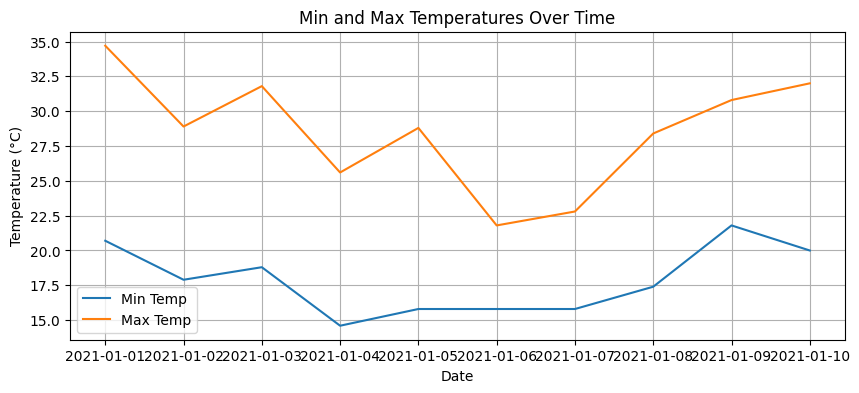

In [6]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

# 객체지향 형태로 문법 쓰기!

# Figure: 전체 그림을 나타내며, 하나 이상의 Axes(플롯)를 포함하는 컨테이너입니다.
# Axes: 개별 플롯 또는 서브플롯을 나타내며, 실제 데이터가 그려지는 영역입니다.

# 플롯과 서브플롯의 차이: 
# 단일 데이터 시각화를 플롯이라고 하며, 하나의 Figure 안에 여러 개의 플롯을 배치한 것을 서브플롯이라고 합니다. 
# 서브플롯은 복수의 Axes 객체로 구성됩니다

fig, ax = plt.subplots(figsize=(10,4))
# fig는 생성된 전체 그림(Figure)을 의미합니다.
# ax는 그림 안에 그릴 하나의 서브플롯(Axes)을 의미합니다.
# figsize는 그림의 크기를 설정합니다. 여기서는 가로 10인치, 세로 4인치로 설정되어 있습니다.

ax.plot(dates, min_temperature, label = 'Min Temp')
# dates에 해당하는 min_temperature 값을 플롯합니다. 
# 그래프의 레이블을 'Min Temp'로 설정합니다.
ax.plot(dates, max_temperature, label = 'Max Temp')
# dates에 해당하는 max_temperature 값을 플롯합니다. 
# 그래프의 레이블을 'Max Temp'로 설정합니다.

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Min and Max Temperatures Over Time')
ax.legend()
ax.grid(True)

#ax.set_xlabel('Date'): x축의 레이블을 'Date'로 설정합니다.
#ax.set_ylabel('Temperature (°C)'): y축의 레이블을 'Temperature (°C)'로 설정합니다.
#ax.set_title('Min and Max Temperatures Over Time'): 그래프의 제목을 'Min and Max Temperatures Over Time'으로 설정합니다.
#ax.legend(): 설정한 레이블을 그래프에 범례로 표시합니다.
#ax.grid(True): 그래프에 그리드를 추가합니다.


# print(type(ax)):  <class 'matplotlib.axes._axes.Axes'>

# ax.legend(loc='right')
# ax.set_xlable





In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import yfinance as yf

data = yf.download("RVSN", start = '2020-01-01', end = '2024-07-02')

data.head()

In [ ]:
data['Open'].index

# 이 부분은 'Open'열의 인덱스를 반환합니다. 
# 데이터프레임의 인덱스는 각 행의 레이블을 나타내며, 이 경우에는 각 날짜가 인덱스가 됩니다. 
# 따라서 data['Open'].index는 데이터프레임 data의 'Open' 열에 해당하는 모든 날짜(인덱스)를 반환합니다.

In [ ]:
fig, ax = plt.subplots()

ax.plot(data['Open'])

ax.set_title('RVSN')

ax.legend(labels = ['Price'], loc = 'best')
#ax.legend(...): 
    #ax는 matplotlib의 Axes 객체를 나타내며, legend 메소드는 이 Axes 객체에 범례를 추가하는 데 사용됩니다.
#labels=['Price']: 
    #범례에 표시될 라벨(이름)을 지정합니다. 
    #여기서는 labels 인자로 ['Price']를 전달하여 범례에 'Price'라는 이름을 지정합니다. 
    #이는 플롯에 표시된 데이터 시리즈를 나타내는 레이블입니다.
#loc='best': 
    #범례를 표시할 위치를 지정합니다. 
    #loc='best'는 matplotlib에게 범례를 그래프에서 가장 적절한 위치에 자동으로 배치하도록 지시합니다. 
    #그래프에서 데이터와 겹치지 않도록 최적의 위치를 찾아줍니다.

ax.set_xlabel('Date')
ax.set_ylabel('Dollar')
ax.set_xticklabels(data['Open'].index, rotation = 20)

plt.show()

In [ ]:
# matplotlib으로 그리는 방법

import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

iris.head()

In [ ]:
data = [iris[iris['species']=="setosa"]['petal_width'], 
        iris[iris['species']=="versicolor"]['petal_width'],
        iris[iris['species']=="virginica"]['petal_width']]

data

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data, labels=['setosa', 'versicolor', 'virginica'])

fig.show()

In [ ]:
#seaborn으로 그리는 방법

import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')
fig, ax = plt.subplots(figsize=(10, 3))

sns.boxplot(data = iris, x = 'species', y = 'petal_width', ax = ax)
ax.set_title("Titles")
ax.set_xlabel("SPECIES")

#print(type(ax))
plt.show()

## 막대 그래프 그려보기

In [12]:
# 라이브러리 불러오기

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

In [13]:
# 데이터 불러오기

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# 기초 데이터

# 그룹화: tips 데이터프레임을 day 열을 기준으로 그룹화합니다.
# 선택: 그룹화된 데이터에서 total_bill 열을 선택합니다.
# 집계: 각 그룹에서 total_bill의 평균값을 계산합니다.
# 결과: 각 요일별로 total_bill의 평균값이 저장된 시리즈가 group_mean 변수에 저장됩니다.

group_mean = tips.groupby(['day'], observed = False)['total_bill'].agg('mean')

#tips.groupby(['day'], observed=False):
    #tips 데이터프레임을 day 열을 기준으로 그룹화합니다.
    #observed=False는 범주형 변수(categorical variable)가 있을 때, 모든 가능한 범주를 고려하지 않도록 설정합니다. 
    #이는 기본값으로 설정되어 있으며, 범주형 변수를 사용하지 않으면 생략해도 됩니다.

#['total_bill']:
#그룹화된 데이터프레임에서 total_bill 열을 선택합니다.

#.agg('mean'):
#agg 함수는 지정된 열에 대해 하나 이상의 집계(aggregation) 연산을 적용합니다. 여기서는 'mean'을 사용하여 평균값을 계산합니다.

group_mean

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [16]:
# 평균값이 가장 높은 날 추출

h_day = group_mean.sort_values(ascending=False).index[0]
#h_day = group_mean.idxmax()

#group_mean.sort_values(ascending=False):
    #group_mean 시리즈를 값에 따라 내림차순으로 정렬합니다.
#.index[0]:
    #정렬된 시리즈에서 가장 첫 번째 인덱스를 선택합니다. 즉, total_bill 평균값이 가장 높은 요일의 인덱스를 선택합니다. 
    # 이 값을 h_day 변수에 저장합니다.
# 주석 처리된 h_day = group_mean.idxmax() 코드는 같은 결과를 얻는 또 다른 방법입니다. 
# idxmax() 함수는 시리즈에서 가장 큰 값의 인덱스를 반환합니다.

h_mean = float(np.round(group_mean.sort_values(ascending=False).values[0],2))

#group_mean.sort_values(ascending=False).values[0]:
    #정렬된 시리즈에서 가장 첫 번째 값을 선택합니다. 즉, total_bill 평균값이 가장 높은 값을 선택합니다.
        #.values:
            #정렬된 시리즈의 값들을 numpy 배열로 반환합니다.
            #위 예시에서 .values는 다음과 같은 배열을 반환합니다:
                #array([21.41, 20.441379, 17.682742, 17.151579])
#np.round(..., 2):
    #선택한 값을 소수점 둘째 자리까지 반올림합니다.
#float(...):
    #반올림된 값을 부동 소수점 형식으로 변환합니다. 이 값을 h_mean 변수에 저장합니다.

h_day, h_mean

#h_day, h_mean:
#요일(h_day)과 평균값(h_mean)을 출력합니다.

('Sun', 21.41)

Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


/var/folders/zk/p59k4t_16mlgf68b5hxclv6m0000gn/T/ipykernel_14795/4174971562.py:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)


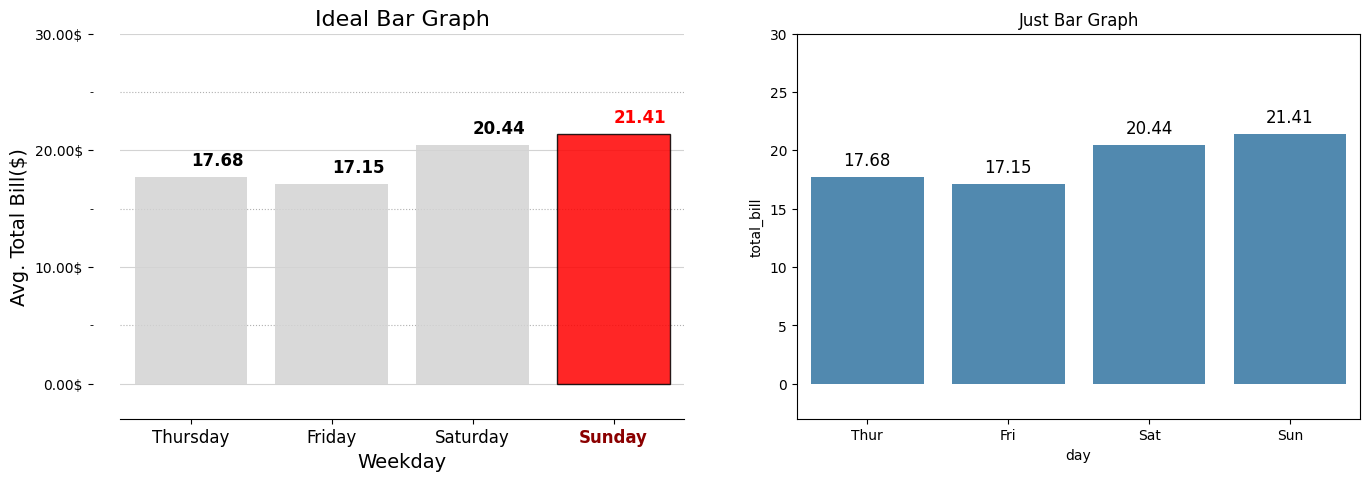

In [25]:
# 시각화 객체지향 선언

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))는 하나의 행과 두 개의 열을 가진 서브플롯을 생성합니다. 
#각 서브플롯의 크기는 가로 16인치, 세로 5인치입니다.

ax0 = sns.barplot(x = 'day', y = 'total_bill', data = tips, errorbar = None, color = 'lightgray', alpha = 0.85, zorder = 2, ax= ax[0])
#ax0는 첫 번째 서브플롯에 요일별 total_bill 평균을 나타내는 막대 그래프를 생성합니다. 
#errorbar=None: 에러 바를 생략하여 깔끔한 막대 그래프를 만듭니다.
#기본 색상은 연한 회색이며, 투명도는 0.85입니다.
#zorder=2: 이 막대 그래프가 다른 그래프나 요소들 위에 그려지도록 설정합니다.
#ax=ax[0]: 첫 번째 서브플롯(ax[0])에 이 막대 그래프를 그립니다.

for p in ax0.patches:
    #ax0.patches:
        # Axes 객체로, 이 객체에는 그래프의 여러 시각적 요소들이 포함됩니다.
        # patches는 이 Axes 객체에 있는 모든 Patch 객체들의 리스트를 반환합니다. 막대 그래프의 경우, 각 막대가 하나의 Patch 객체입니다.

    # print(p, type(p))
    
    # 각 막대에 시각적 속성을 설정 
    fontweight= "bold"
    color = 'k' # 기본 색상은 검정색
    height = np.round(p.get_height(),2) # 막대의 높이 (반올림하여 소수점 두 자리까지)
    
    #print(height)
    
    # 특정 조건을 만족하는 막대에 대해 속성을 변경
    if h_mean == height: 
        # h_mean과 같은 높이의 막대는 강조
        # 즉 아까 위에서 나온 Sun 그래프이면 색상을 다르게 주겠다
        fontweight = 'bold'
        color = 'red'
        p.set_facecolor(color) #막대 색상을 빨간색으로
        p.set_edgecolor('black') # 막대 테두리 색상 검정색으로
        
    #else:
    #   p.set_facecolor(color)
    #   p.set_edgecolor('yellow')
    
    # 막대 위에 텍스트 추가(막대의 높이 값)
    # : 이 코드는 각 막대의 중앙 상단에 막대의 높이 값을 텍스트로 표시합니다. 텍스트의 위치, 크기, 굵기, 색상 등을 설정하여 시각적으로 명확하게 표시합니다. 
    # 전체적인 목적은 그래프의 막대가 나타내는 값을 직관적으로 알 수 있도록 도와주는 것입니다.
    ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12, fontweight= fontweight, color=color)

        #ax0.text(...):
            #ax0는 Axes 객체로, 이 객체에 텍스트를 추가합니다. text 메서드는 지정된 위치에 텍스트를 그립니다.
        #p.get_x() + p.get_width() / 2.:
            #p.get_x()는 막대의 x 좌표 (막대의 왼쪽 끝)를 반환합니다.
            #p.get_width()는 막대의 너비를 반환합니다.
            #p.get_x() + p.get_width() / 2.는 막대의 중앙 x 좌표를 계산합니다. 이렇게 해서 텍스트가 막대의 중앙에 위치하게 됩니다.
        #height + 1:
            #height는 막대의 높이를 나타냅니다.
            #height + 1은 텍스트를 막대의 상단보다 약간 위에 위치하게 합니다. 
            #이렇게 하면 텍스트가 막대와 겹치지 않고, 막대 위에 적절히 배치됩니다.
        # height:
            # 텍스트로 표시될 내용입니다. 여기서는 막대의 높이를 텍스트로 표시합니다.
        #ha='center':
            #ha는 수평 정렬(horizontal alignment)을 의미합니다.
            #'center'로 설정하면 텍스트가 지정된 x 좌표의 중앙에 정렬됩니다.
        #size=12:
            #텍스트의 폰트 크기를 지정합니다. 여기서는 크기를 12로 설정합니다.
        #fontweight=fontweight:
            #텍스트의 폰트 굵기를 지정합니다. fontweight 변수는 각 막대에 대해 설정된 굵기 값(예: 'bold')을 사용합니다.
        #color=color:
            #텍스트의 색상을 지정합니다. color 변수는 각 막대에 대해 설정된 색상 값(예: 'k' 또는 'red')을 사용합니다.
            # 막대의 높이를 기반으로 텍스트를 추가하고, h_mean과 같은 높이의 막대(특정 요일)를 강조하여 색상을 빨간색으로 설정하고 테두리를 검은색으로 설정합니다.
      

#축 옵션 UDF 함수

def major_formatter(x, pos):
    return "%.2f$" % x
#이 함수는 y축 눈금 값을 받아서 포맷팅한 문자열을 반환합니다.
#x는 눈금 값, pos는 눈금의 위치를 나타냅니다.
#반환 값은 소수점 둘째 자리까지의 숫자에 달러 기호를 붙인 문자열입니다.


formatter = FuncFormatter(major_formatter)
# FuncFormatter를 사용하여 major_formatter 함수를 y축 눈금 포맷터로 지정합니다.


ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)
#y축의 범위를 -3에서 30까지 설정합니다.
#그래프 제목을 "Ideal Bar Graph"로 설정하고, 글자 크기를 16으로 지정합니다.

#축옵션 설정

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
#spines는 그래프의 테두리 선을 나타냅니다.
#ax0.spines['top'].set_visible(False): 그래프의 상단 테두리 선을 보이지 않게 합니다.
#ax0.spines['left'].set_position(("outward", 20)): 그래프의 왼쪽 테두리 선을 20 포인트 바깥으로 이동시킵니다.
#ax0.spines['left'].set_visible(False): 왼쪽 테두리 선을 보이지 않게 합니다.
#ax0.spines['right'].set_visible(False): 오른쪽 테두리 선을 보이지 않게 합니다.

#y축 눈금 설정

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))
#주요 눈금을 10 단위로 설정합니다.
#주요 눈금의 포맷터를 아까 정의한 formatter로 설정합니다.
#부차 눈금을 5 단위로 설정합니다.


ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)
# y축 레이블을 "Avg. Total Bill($)"로 설정하고, 글자 크기를 14로 지정합니다.

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")
#주요 눈금에 대해 y축 그리드를 밝은 회색으로 설정합니다.
#부차 눈금에 대해 y축 그리드를 점선 스타일로 설정합니다.

# X축 설정 및 강조

ax0.set_xlabel("Weekday", fontsize=14)
# x축 레이블을 "Weekday"로 설정하고, 글자 크기를 14로 지정합니다.

for xtick in ax0.get_xticklabels(): #x축 눈금 레이블을 순회합니다.
  print(xtick)
  if xtick.get_text() == h_day: #만약 눈금 레이블의 텍스트가 h_day와 같다면, 해당 레이블을 강조합니다.
    xtick.set_color("darkred") #강조된 레이블의 색상을 진한 빨간색으로 설정합니다.
    xtick.set_fontweight("demibold") #강조된 레이블의 글자 굵기를 "demibold"로 설정합니다.

ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)
#x축 눈금 레이블을 설정하고, 글자 크기를 12로 지정합니다.
#이제 전체 코드가 각각의 설정을 통해 그래프의 축과 눈금, 레이블 등을 세밀하게 조정하는 방법을 이해할 수 있습니다. 
#이를 통해 그래프를 더 직관적이고 읽기 쉽게 만들 수 있습니다.


ax1 = sns.barplot(x = 'day', y = 'total_bill', data = tips, errorbar = None, alpha = 0.85, ax= ax[1])

for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

plt.show()
